# Review of Experimental Results for Isolated Digits

In [1]:
import numpy as np
import pandas as pd
import math
import joblib
import optuna
from os import path
import matplotlib.pyplot as plt
from ESN import ESN as esn
from sklearn.metrics import f1_score as f1
from sklearn.metrics import roc_auc_score as rocAuc
from sklearn.metrics import accuracy_score
from scipy.interpolate import make_interp_spline

In [2]:
df = pd.read_excel('Architecture.xlsx').iloc[:,0]

 
studies = pd.DataFrame([
    ["study_1469", joblib.load('Digit-experiment-' + str(df[0]) + ".pkl").best_value,  joblib.load('Digit-experiment-' + str(df[0]) + ".pkl").best_trial,  joblib.load('Digit-experiment-' + str(df[0]) + ".pkl").best_trials], 
    #["study_146A", joblib.load('NARMA-experiment-' + str(df[1]) + ".pkl").best_value,  joblib.load('NARMA-experiment-' + str(df[1]) + ".pkl").best_trial,  joblib.load('NARMA-experiment-' + str(df[1]) + ".pkl").best_trials], 
    #["study_146B", joblib.load('NARMA-experiment-' + str(df[2]) + ".pkl").best_value,  joblib.load('NARMA-experiment-' + str(df[2]) + ".pkl").best_trial,  joblib.load('NARMA-experiment-' + str(df[2]) + ".pkl").best_trials], 
    #["study_1479", joblib.load('NARMA-experiment-' + str(df[3]) + ".pkl").best_value,  joblib.load('NARMA-experiment-' + str(df[3]) + ".pkl").best_trial,  joblib.load('NARMA-experiment-' + str(df[3]) + ".pkl").best_trials], 
    #["study_147A", joblib.load('NARMA-experiment-' + str(df[4]) + ".pkl").best_value,  joblib.load('NARMA-experiment-' + str(df[4]) + ".pkl").best_trial,  joblib.load('NARMA-experiment-' + str(df[4]) + ".pkl").best_trials], 
    #["study_147B", joblib.load('NARMA-experiment-' + str(df[5]) + ".pkl").best_value,  joblib.load('NARMA-experiment-' + str(df[5]) + ".pkl").best_trial,  joblib.load('NARMA-experiment-' + str(df[5]) + ".pkl").best_trials], 
    #["study_1569", joblib.load('NARMA-experiment-' + str(df[6]) + ".pkl").best_value,  joblib.load('NARMA-experiment-' + str(df[6]) + ".pkl").best_trial,  joblib.load('NARMA-experiment-' + str(df[6]) + ".pkl").best_trials], 
    #["study_156A", joblib.load('NARMA-experiment-' + str(df[7]) + ".pkl").best_value,  joblib.load('NARMA-experiment-' + str(df[7]) + ".pkl").best_trial,  joblib.load('NARMA-experiment-' + str(df[7]) + ".pkl").best_trials], 
    #["study_156B", joblib.load('NARMA-experiment-' + str(df[8]) + ".pkl").best_value,  joblib.load('NARMA-experiment-' + str(df[8]) + ".pkl").best_trial,  joblib.load('NARMA-experiment-' + str(df[8]) + ".pkl").best_trials], 
    #["study_1579", joblib.load('NARMA-experiment-' + str(df[9]) + ".pkl").best_value,  joblib.load('NARMA-experiment-' + str(df[9]) + ".pkl").best_trial,  joblib.load('NARMA-experiment-' + str(df[9]) + ".pkl").best_trials], 
    #["study_157A", joblib.load('NARMA-experiment-' + str(df[10]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[10]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[10]) + ".pkl").best_trials],
    #["study_157B", joblib.load('NARMA-experiment-' + str(df[11]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[11]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[11]) + ".pkl").best_trials],
    #["study_2469", joblib.load('NARMA-experiment-' + str(df[12]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[12]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[12]) + ".pkl").best_trials],
    #["study_246A", joblib.load('NARMA-experiment-' + str(df[13]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[13]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[13]) + ".pkl").best_trials],
    #["study_246B", joblib.load('NARMA-experiment-' + str(df[14]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[14]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[14]) + ".pkl").best_trials],
    #["study_2479", joblib.load('NARMA-experiment-' + str(df[15]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[15]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[15]) + ".pkl").best_trials],
    #["study_247A", joblib.load('NARMA-experiment-' + str(df[16]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[16]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[16]) + ".pkl").best_trials],
    #["study_247B", joblib.load('NARMA-experiment-' + str(df[17]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[17]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[17]) + ".pkl").best_trials],
    #["study_2569", joblib.load('NARMA-experiment-' + str(df[18]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[18]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[18]) + ".pkl").best_trials],
    #["study_256A", joblib.load('NARMA-experiment-' + str(df[19]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[19]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[19]) + ".pkl").best_trials],
    #["study_256B", joblib.load('NARMA-experiment-' + str(df[20]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[20]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[20]) + ".pkl").best_trials],
    #["study_2579", joblib.load('NARMA-experiment-' + str(df[21]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[21]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[21]) + ".pkl").best_trials],
    #["study_257A", joblib.load('NARMA-experiment-' + str(df[22]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[22]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[22]) + ".pkl").best_trials],
    #["study_257B", joblib.load('NARMA-experiment-' + str(df[23]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[23]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[23]) + ".pkl").best_trials],
    #["study_3469", joblib.load('NARMA-experiment-' + str(df[24]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[24]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[24]) + ".pkl").best_trials],
    #["study_346A", joblib.load('NARMA-experiment-' + str(df[25]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[25]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[25]) + ".pkl").best_trials],
    #["study_346B", joblib.load('NARMA-experiment-' + str(df[26]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[26]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[26]) + ".pkl").best_trials],
    #["study_3479", joblib.load('NARMA-experiment-' + str(df[27]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[27]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[27]) + ".pkl").best_trials],
    #["study_347A", joblib.load('NARMA-experiment-' + str(df[28]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[28]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[28]) + ".pkl").best_trials],
    #["study_347B", joblib.load('NARMA-experiment-' + str(df[29]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[29]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[29]) + ".pkl").best_trials],
    #["study_3569", joblib.load('NARMA-experiment-' + str(df[30]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[30]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[30]) + ".pkl").best_trials],
    #["study_356A", joblib.load('NARMA-experiment-' + str(df[31]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[31]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[31]) + ".pkl").best_trials],
    #["study_356B", joblib.load('NARMA-experiment-' + str(df[32]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[32]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[32]) + ".pkl").best_trials],
    #["study_3579", joblib.load('NARMA-experiment-' + str(df[33]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[33]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[33]) + ".pkl").best_trials],
    #["study_357A", joblib.load('NARMA-experiment-' + str(df[34]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[34]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[34]) + ".pkl").best_trials],
    #["study_357B", joblib.load('NARMA-experiment-' + str(df[35]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[35]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[35]) + ".pkl").best_trials],
    #["study_8469", joblib.load('NARMA-experiment-' + str(df[36]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[36]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[36]) + ".pkl").best_trials],
    #["study_846A", joblib.load('NARMA-experiment-' + str(df[37]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[37]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[37]) + ".pkl").best_trials],
    #["study_846B", joblib.load('NARMA-experiment-' + str(df[38]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[38]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[38]) + ".pkl").best_trials],
    #["study_8479", joblib.load('NARMA-experiment-' + str(df[39]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[39]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[39]) + ".pkl").best_trials],
    #["study_847A", joblib.load('NARMA-experiment-' + str(df[40]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[40]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[40]) + ".pkl").best_trials],
    #["study_847B", joblib.load('NARMA-experiment-' + str(df[41]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[41]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[41]) + ".pkl").best_trials],
    #["study_8569", joblib.load('NARMA-experiment-' + str(df[42]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[42]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[42]) + ".pkl").best_trials],
    #["study_856A", joblib.load('NARMA-experiment-' + str(df[43]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[43]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[43]) + ".pkl").best_trials],
    #["study_856B", joblib.load('NARMA-experiment-' + str(df[44]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[44]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[44]) + ".pkl").best_trials],
    #["study_8579", joblib.load('NARMA-experiment-' + str(df[45]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[45]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[45]) + ".pkl").best_trials],
    #["study_857A", joblib.load('NARMA-experiment-' + str(df[46]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[46]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[46]) + ".pkl").best_trials],
    #["study_857B", joblib.load('NARMA-experiment-' + str(df[47]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[47]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[47]) + ".pkl").best_trials]
])



In [3]:
studies = studies.sort_values(by=1)
studies = studies.reset_index(drop=True)
studies.head(20)

,0,1,2,3
0,study_1469,0.806667,"FrozenTrial(number=8, values=[0.80666666666666...","[FrozenTrial(number=8, values=[0.8066666666666..."


## Confirm Trial Results
Make sure the above results can be duplicated

In [4]:
def getScores(actual, predicted): 
    np.seterr(all='raise')
    try:
        f1Score = f1(actual, predicted, average='samples')
        
        aucScore = rocAuc(actual, predicted)
        
        accuracyScore = accuracy_score(actual, predicted)
        
    except FloatingPointError:
        print('Exceptionally bad generation of ESN. Aborting sub-trial. (1)')
        f1Score = -1
        aucScore = -1
        accuracyScore = -1
        
    except ValueError:
        print('Exceptionally bad generation of ESN. Aborting sub-trial. (3)')
        f1Score = -1
        aucScore = -1
        accuracyScore = -1

    np.seterr(all='warn')
    return f1Score, aucScore, accuracyScore

def ttvSplit(data, numClasses):
    np.random.seed(0)
    data = pd.DataFrame(data)
    numFeatures = data.shape[1] - numClasses
    features = pd.DataFrame(data.iloc[:,:numFeatures])
    targets = data.iloc[:,numFeatures:numFeatures+numClasses]

    groups = pd.Series(features.iloc[:,0].unique()).sample(frac=1).reset_index(drop=True)
    ind0 = round(groups.shape[0] * .6)
    ind1 = round(groups.shape[0] * .2) + ind0

    trainingGroups = groups.iloc[0:ind0]
    testGroups = groups.iloc[ind0:ind1]
    validGroups = groups.iloc[ind1:]

    training = features.loc[features.iloc[:,0].isin(trainingGroups.values)]
    test = features.loc[features.iloc[:,0].isin(testGroups.values)]
    validation = features.loc[features.iloc[:,0].isin(validGroups.values)]

    trainingT = targets.loc[targets.index.isin(training.index)]
    testT = targets.loc[targets.index.isin(test.index)]
    validT = targets.loc[targets.index.isin(validation.index)]

    return training.to_numpy(), trainingT.to_numpy(), test.to_numpy(), testT.to_numpy(), validation.to_numpy(), validT.to_numpy()

#If all the classes are in a single column, this function
#will break up that representation into multiple columns
#for the ESN
def esnClassRep(data, uniqueClasses):
    targets = np.zeros((data.shape[0],uniqueClasses))
    
    for i in range(0, data.shape[0]):
        rowTarget = int(data[i,-1])
        targets[i,rowTarget] = 1
        
    data = data[:,:-1]
    data = np.concatenate((data,targets), axis=1)
    return data

def compressTargets(features, output):
    numTimeSeq = np.unique(features[:,0]).shape[0]    #get number of unique time sequences
    _, groupID = np.unique(features[:,0], return_index=True)
    groupID = features[np.sort(groupID), 0]
    
    indexer = 0
    r = np.zeros((numTimeSeq, output.shape[1]))
    for i in groupID:
        mask = (features[:, 0] == i)         #grab all rows that have groupID i
        r[indexer,:] = (output[mask,:])[0]     #we don't need to average this 
        indexer = indexer + 1
    return r

#### Generate Data

In [5]:
#Generate Data
numClasses = 5
df = pd.read_csv('data.csv')
df = df.loc[df.iloc[:,-1].isin(np.arange(0,numClasses))]
df = df.to_numpy()
df = esnClassRep(df,numClasses)
trainin, trainout, testin, testout, valin, valout = ttvSplit(df, numClasses)
testout = compressTargets(testin, testout)

In [6]:
trainin.shape

(46910, 86)

In [7]:
trainout.shape

(46910, 5)

In [8]:
testin.shape

(15466, 86)

In [9]:
testout.shape

(300, 5)

#### Trial vs Recreated

In [11]:
# Parameters (to tune)
#N = trial.suggest_int('N', 10,100) For Jaeger et al's work we know 20 neurons was sufficient and we can always scale up
np.random.seed(0)
K = 85 
L = numClasses
N = 50                     #Text used 200
v = (np.random.uniform(-1,1, trainin.shape[0]))
sv = 0                     #From text
sfb = 0                   #No feedback required
dfb = 0
outAlg = 1 
isBias = True
isClassification = True
washout = 10

for i in range(0,10):
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = studies.iloc[i,2].user_attrs['distribution']

    model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

    seed = studies.iloc[i,2].user_attrs['seed']
    
    np.seterr(all='warn')
    model.generateW(seed)
    model.generateWin(seed)
    model.generateWfb(seed)

    model.train(input_u = trainin, teacher=trainout, washout=washout) #zero start state is default

    predicted = model.run(input_u=testin, time=testin.shape[0], washout=washout)

    f1Score, aucScore, accuracyScore = getScores(testout, predicted)
    print(studies.iloc[i,0])
    print("F1: " + str(studies.iloc[i,2].user_attrs['F1']) + ", " + str(f1Score))
    print("AUC: " + str(studies.iloc[i,2].user_attrs['AUC']) + ", " + str(aucScore))
    print("Accuracy: " + str(studies.iloc[i,2].user_attrs['Accuracy']) + ", " + str(accuracyScore) + "\n")

study_1469
F1: 0.8066666666666666, 0.8066666666666666
AUC: 0.878430392524078, 0.878430392524078
Accuracy: 0.8066666666666666, 0.8066666666666666



IndexError: single positional indexer is out-of-bounds

# Questions to Answer:
### How Does Model Accuracy Change as We Increase the Number of Neurons, N?
### Which reservoir activation function is the best?
### Is there an overwhelming difference in how the distribution type changes the model?
### Which connections within the reservoir give the best setup for this pattern generation task?
### None of the models which ranked well used a tanh output activation: discuss.
### Time complexity of different model instantiations

# How Does Model Accuracy Change as We Increase the Number of Neurons, N?

In [7]:
np.random.seed(0)
K = 1
L = 1
N = 100                    #From text
v = (np.random.uniform(-1,1, size)).reshape(-1,1) #from text
sv = 0.0001                #From text
sfb = 0                    #No feedback required
dfb = 0
outAlg = 1  
isBias = True
washout = 200
startState = np.zeros((1,N))

inc = 100
x = np.arange(50,551,inc) #Number of Neurons
y = np.zeros((6,1))
z = np.zeros((6,1))
scores = np.zeros((15,2))
plotInfo3 = pd.DataFrame()
plotInfo30 = pd.DataFrame()
for i in range(0,studies.shape[0]): #pick a model
    N = 50
    startState = np.zeros((1,N))
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = studies.iloc[i,2].user_attrs['distribution']
    
    for j in range(0,6):#This is for increasing neurons for a particular model instantiation
        startState = np.zeros((1,N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                        L = L,
                        N = N,
                        p = p,
                        a = a,
                        v = v,
                        dw = dw,
                        din = din,
                        dfb = dfb,
                        sin = sin,
                        sfb = sfb,
                        sv = sv,
                        resFunc = resFunc,
                        outFunc = outFunc,
                        outAlg = outAlg,
                        B = B,
                        distribution = distribution,
                        isBias = isBias,
                        isU2Y = isU2Y,
                        isY2Y = isY2Y,
                        isClassification = isClassification)

            model.sv = sv
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = trainin, teacher=trainout, washout=washout)

            model.sv = 0
            predicted = model.run(input_u=testin, time=testin.shape[0],washout=washout, state=startState)

            nrmse0, mae0, r20 = getScores(testout[washout:], predicted)
            scores[k,0] = nrmse0
            scores[k,1] = r20
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores[:,0])
        standard_deviation = np.std(scores[:,0])
        distance_from_mean = abs(scores[:,0] - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers_nrmse = scores[not_outlier,0]
        no_outliers_r2 = scores[not_outlier,1]

        #average scores together
        nrmse0 = np.mean(no_outliers_nrmse)
        r20 = np.mean(no_outliers_r2)
        y[j,0] = nrmse0
        z[j,0] = r20
        #print(str(N) , str(nrmse0))
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 100 neurons
    plotInfo3 = pd.concat((plotInfo3, pd.DataFrame(y, columns=[studies.iloc[i,0]])), axis=1)
    plotInfo30 = pd.concat((plotInfo30, pd.DataFrame(z, columns=[studies.iloc[i,0]])), axis=1)

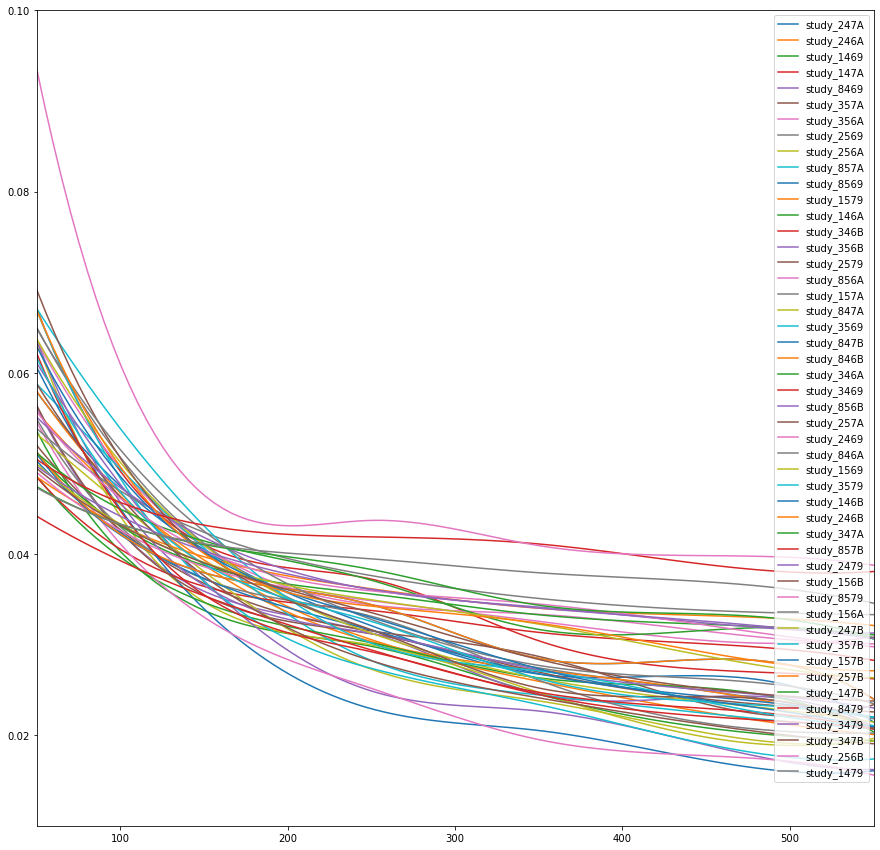

In [8]:
#add to plot
plt.figure(figsize=(15, 15))
for col in range(0,plotInfo3.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo3.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo3.columns[col])

plt.legend()
plt.xlim([50,550])
plt.ylim([0.01,0.1])
plt.show()

In [9]:
#Cleanup the plot
pd.set_option('display.max_columns', None)
plotInfo30.iloc[:,:]

,study_247A,study_246A,study_1469,study_147A,study_8469,study_357A,study_356A,study_2569,study_256A,study_857A,study_8569,study_1579,study_146A,study_346B,study_356B,study_2579,study_856A,study_157A,study_847A,study_3569,study_847B,study_846B,study_346A,study_3469,study_856B,study_257A,study_2469,study_846A,study_1569,study_3579,study_146B,study_246B,study_347A,study_857B,study_2479,study_156B,study_8579,study_156A,study_247B,study_357B,study_157B,study_257B,study_147B,study_8479,study_3479,study_347B,study_256B,study_1479
0,0.658074,0.683038,0.707353,0.540997,0.676211,0.726731,0.584253,0.546818,0.588759,0.648429,0.624234,0.652041,0.760504,0.762341,0.613927,0.676705,0.696737,0.693354,0.713961,0.539872,0.744557,0.762792,0.734932,0.803036,0.582609,0.645619,0.756941,0.702472,0.585386,0.537066,0.734703,0.732137,0.735303,0.605732,0.693442,0.513070,0.683891,0.569229,0.744109,0.615704,0.593519,0.542476,0.773177,0.742753,0.750887,0.751447,0.112880,0.772848
1,0.833970,0.842172,0.884225,0.829929,0.868631,0.863951,0.830539,0.822461,0.876572,0.830697,0.882364,0.845904,0.878615,0.866171,0.860866,0.872923,0.889275,0.859487,0.853219,0.862140,0.858963,0.841104,0.848620,0.872671,0.864916,0.856962,0.849114,0.818831,0.829245,0.807182,0.854717,0.854629,0.826868,0.872933,0.822962,0.835488,0.834631,0.816351,0.845519,0.846739,0.834677,0.837667,0.830355,0.811825,0.835693,0.846654,0.779263,0.829788
2,0.894645,0.905391,0.908335,0.858788,0.901390,0.899308,0.880467,0.898944,0.906162,0.919307,0.946501,0.906309,0.907812,0.885150,0.937447,0.901994,0.935129,0.888426,0.924101,0.924316,0.898978,0.868180,0.872236,0.912256,0.900936,0.919516,0.877231,0.857053,0.900596,0.906721,0.879761,0.879734,0.860805,0.913186,0.868638,0.898529,0.869974,0.891278,0.876811,0.892789,0.888906,0.881548,0.852362,0.823460,0.868504,0.885943,0.805922,0.843140
3,0.927640,0.931685,0.938358,0.905762,0.938569,0.915899,0.887233,0.923700,0.935401,0.939103,0.957391,0.924884,0.929738,0.900713,0.947169,0.926689,0.961579,0.931337,0.942693,0.944619,0.926867,0.883329,0.888077,0.936399,0.924632,0.941054,0.892987,0.875726,0.929957,0.924335,0.917473,0.917441,0.898428,0.939156,0.882629,0.935150,0.879871,0.921880,0.894825,0.929778,0.923763,0.894342,0.879911,0.829910,0.883172,0.918407,0.831417,0.855140
4,0.927275,0.948255,0.955991,0.924866,0.940245,0.944483,0.899769,0.937080,0.960135,0.948198,0.970027,0.936083,0.935440,0.908805,0.963482,0.942054,0.968035,0.954010,0.958644,0.963146,0.940008,0.889053,0.895201,0.946329,0.936792,0.954519,0.906488,0.884438,0.943158,0.943028,0.917293,0.917276,0.898938,0.950666,0.894206,0.940096,0.895707,0.929841,0.916519,0.943325,0.942076,0.914443,0.886796,0.847973,0.892674,0.935527,0.840359,0.862610
5,0.953408,0.959091,0.962092,0.930161,0.955739,0.944402,0.908176,0.951595,0.960012,0.956582,0.973775,0.956014,0.957875,0.919427,0.973456,0.948257,0.975400,0.958312,0.962206,0.969555,0.950970,0.896041,0.902610,0.956596,0.946558,0.963327,0.903920,0.887375,0.953286,0.954837,0.940843,0.940827,0.904811,0.956329,0.901455,0.956347,0.910798,0.943906,0.929625,0.951269,0.955606,0.925827,0.904068,0.854194,0.904988,0.942753,0.848626,0.879580


In [10]:
temp = pd.DataFrame.transpose(plotInfo30)
temp = temp.sort_values(by=5, ascending = False)
plotInfo30 = pd.DataFrame.transpose(temp)

In [11]:
plotInfo30.head(5)

,study_856A,study_8569,study_356B,study_3569,study_257A,study_847A,study_1469,study_256A,study_246A,study_157A,study_146A,study_3469,study_857A,study_156B,study_857B,study_1579,study_8469,study_157B,study_3579,study_247A,study_1569,study_2569,study_357B,study_847B,study_2579,study_856B,study_357A,study_156A,study_347B,study_146B,study_246B,study_147A,study_247B,study_257B,study_346B,study_8579,study_356A,study_3479,study_347A,study_147B,study_2469,study_346A,study_2479,study_846B,study_846A,study_1479,study_8479,study_256B
0,0.696737,0.624234,0.613927,0.539872,0.645619,0.713961,0.707353,0.588759,0.683038,0.693354,0.760504,0.803036,0.648429,0.513070,0.605732,0.652041,0.676211,0.593519,0.537066,0.658074,0.585386,0.546818,0.615704,0.744557,0.676705,0.582609,0.726731,0.569229,0.751447,0.734703,0.732137,0.540997,0.744109,0.542476,0.762341,0.683891,0.584253,0.750887,0.735303,0.773177,0.756941,0.734932,0.693442,0.762792,0.702472,0.772848,0.742753,0.112880
1,0.889275,0.882364,0.860866,0.862140,0.856962,0.853219,0.884225,0.876572,0.842172,0.859487,0.878615,0.872671,0.830697,0.835488,0.872933,0.845904,0.868631,0.834677,0.807182,0.833970,0.829245,0.822461,0.846739,0.858963,0.872923,0.864916,0.863951,0.816351,0.846654,0.854717,0.854629,0.829929,0.845519,0.837667,0.866171,0.834631,0.830539,0.835693,0.826868,0.830355,0.849114,0.848620,0.822962,0.841104,0.818831,0.829788,0.811825,0.779263
2,0.935129,0.946501,0.937447,0.924316,0.919516,0.924101,0.908335,0.906162,0.905391,0.888426,0.907812,0.912256,0.919307,0.898529,0.913186,0.906309,0.901390,0.888906,0.906721,0.894645,0.900596,0.898944,0.892789,0.898978,0.901994,0.900936,0.899308,0.891278,0.885943,0.879761,0.879734,0.858788,0.876811,0.881548,0.885150,0.869974,0.880467,0.868504,0.860805,0.852362,0.877231,0.872236,0.868638,0.868180,0.857053,0.843140,0.823460,0.805922
3,0.961579,0.957391,0.947169,0.944619,0.941054,0.942693,0.938358,0.935401,0.931685,0.931337,0.929738,0.936399,0.939103,0.935150,0.939156,0.924884,0.938569,0.923763,0.924335,0.927640,0.929957,0.923700,0.929778,0.926867,0.926689,0.924632,0.915899,0.921880,0.918407,0.917473,0.917441,0.905762,0.894825,0.894342,0.900713,0.879871,0.887233,0.883172,0.898428,0.879911,0.892987,0.888077,0.882629,0.883329,0.875726,0.855140,0.829910,0.831417
4,0.968035,0.970027,0.963482,0.963146,0.954519,0.958644,0.955991,0.960135,0.948255,0.954010,0.935440,0.946329,0.948198,0.940096,0.950666,0.936083,0.940245,0.942076,0.943028,0.927275,0.943158,0.937080,0.943325,0.940008,0.942054,0.936792,0.944483,0.929841,0.935527,0.917293,0.917276,0.924866,0.916519,0.914443,0.908805,0.895707,0.899769,0.892674,0.898938,0.886796,0.906488,0.895201,0.894206,0.889053,0.884438,0.862610,0.847973,0.840359


In [12]:
plotInfo3_10 = plotInfo3[[plotInfo30.columns[0], plotInfo30.columns[1], plotInfo30.columns[2], plotInfo30.columns[3], plotInfo30.columns[4], plotInfo30.columns[5], plotInfo30.columns[6], plotInfo30.columns[7], plotInfo30.columns[8], plotInfo30.columns[9]]]

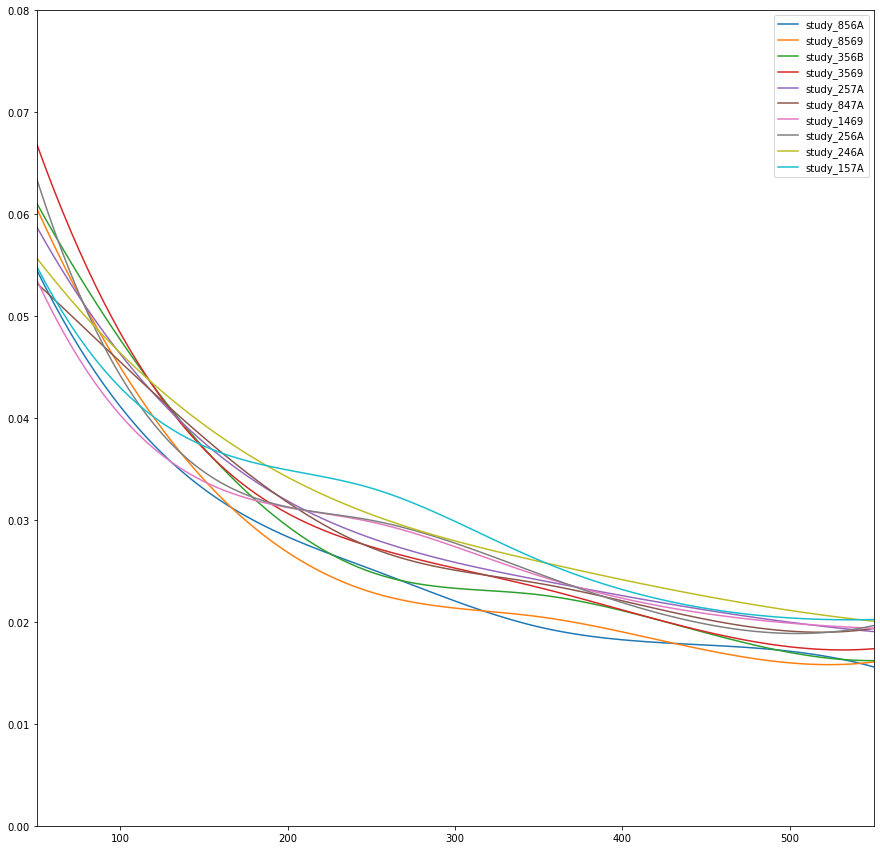

In [13]:
#add to plot
plt.figure(figsize=(15, 15))
for col in range(0,plotInfo3_10.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo3_10.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo3_10.columns[col])

plt.legend()
plt.xlim([50,550])
plt.ylim([0,0.08])
plt.show()

# Which reservoir activation function is the best?

## Models that scored very similar, but used different activation function

In [14]:
np.random.seed(0)
K = 1
L = 1
N = 100                    #From text
v = (np.random.uniform(-1,1, size)).reshape(-1,1) #from text
sv = 0.0001                #From text
sfb = 0                    #No feedback required
dfb = 0
outAlg = 1  
isBias = True
washout = 200
startState = np.zeros((1,N))

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo0 = pd.DataFrame()
for c in range(0,2): #Select models for evaluation
    i = 0
    if c == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_256A'].index[0]
    elif c == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_246A'].index[0]
    N = 50
    startState = np.zeros((1,N))
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = studies.iloc[i,2].user_attrs['distribution']
    
    washout = 1000
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        startState = np.zeros((1,N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            model.sv = sv
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = trainin, teacher=trainout, washout=washout)

            model.sv = 0
            predicted = model.run(input_u=testin, time=testin.shape[0],washout=washout, state=startState)

            nrmse0, mae0, r20 = getScores(testout[washout:], predicted)
            scores[k,0] = nrmse0
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo0 = pd.concat((plotInfo0, pd.DataFrame(y, columns=[studies.iloc[i,0]])), axis=1)

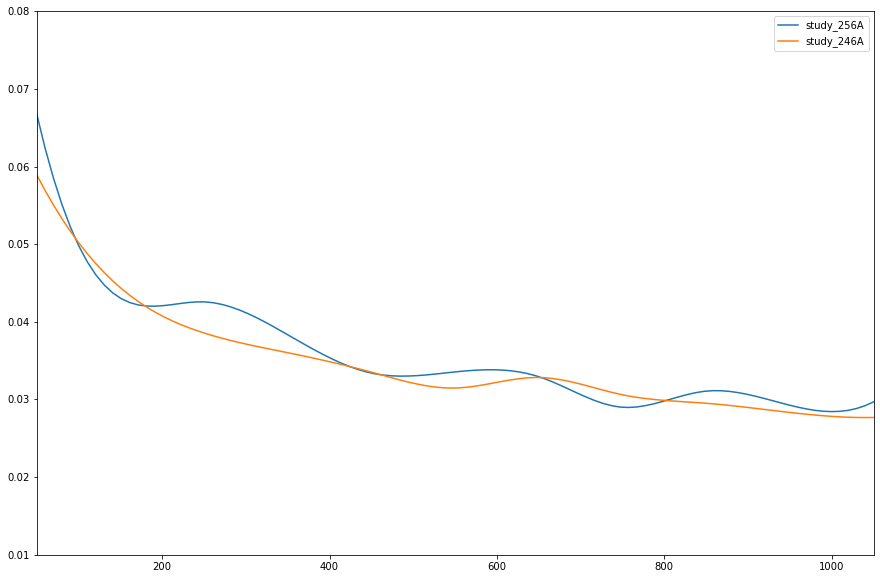

In [15]:
#add to plot
plt.figure(figsize=(15, 10))
for col in range(0,plotInfo0.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo0.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo0.columns[col])

plt.legend()
plt.xlim([50,1050])
plt.ylim([0.01,0.08])
plt.show()

## Same exact model with different activation function

In [16]:
np.random.seed(0)
K = 1
L = 1
N = 100                    #From text
v = (np.random.uniform(-1,1, size)).reshape(-1,1) #from text
sv = 0.0001                #From text
sfb = 0                    #No feedback required
dfb = 0
outAlg = 1  
isBias = True
washout = 200
startState = np.zeros((1,N))

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo1 = pd.DataFrame()
count = 1


i = studies.loc[studies.iloc[:,0] == 'study_256A'].index[0]
while(count < 3): #Select models for evaluation
    N = 50
    startState = np.zeros((1,N))
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = count
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = studies.iloc[i,2].user_attrs['distribution']
    
    washout = 1000
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        startState = np.zeros((1,N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            model.sv = sv
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = trainin, teacher=trainout, washout=washout)

            model.sv = 0
            predicted = model.run(input_u=testin, time=testin.shape[0],washout=washout, state=startState)

            nrmse0, mae0, r20 = getScores(testout[washout:], predicted)
            scores[k,0] = nrmse0
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo1 = pd.concat((plotInfo1, pd.DataFrame(y, columns=[str(count)])), axis=1)
    count = count + 1

In [17]:
plotInfo1 = plotInfo1.rename(columns={"1": "study_246A", "2": "study_256A"})

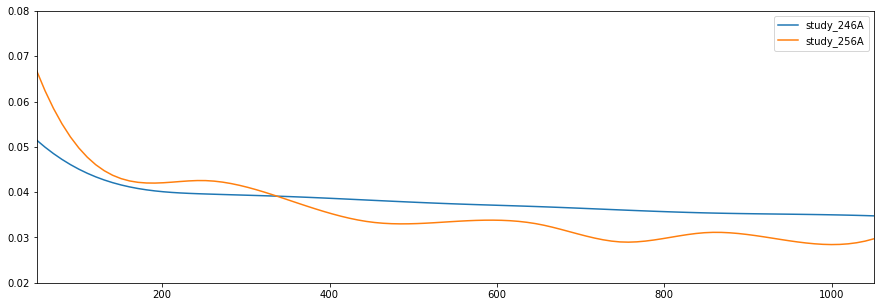

In [18]:
#add to plot
plt.figure(figsize=(15, 5))
for col in range(0,plotInfo1.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo1.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo1.columns[col])

plt.legend()
plt.xlim([50,1050])
plt.ylim([0.02,0.08])
plt.show()

In [19]:
np.random.seed(0)
K = 1
L = 1
N = 100                    #From text
v = (np.random.uniform(-1,1, size)).reshape(-1,1) #from text
sv = 0.0001                #From text
sfb = 0                    #No feedback required
dfb = 0
outAlg = 1  
isBias = True
washout = 200
startState = np.zeros((1,N))

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo2 = pd.DataFrame()
count = 1


i = studies.loc[studies.iloc[:,0] == 'study_246A'].index[0]
while(count < 3): #Select models for evaluation
    N = 50
    startState = np.zeros((1,N))
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = count
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = studies.iloc[i,2].user_attrs['distribution']
    
    washout = 1000
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        startState = np.zeros((1,N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            model.sv = sv
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = trainin, teacher=trainout, washout=washout)

            model.sv = 0
            predicted = model.run(input_u=testin, time=testin.shape[0],washout=washout, state=startState)

            nrmse0, mae0, r20 = getScores(testout[washout:], predicted)
            scores[k,0] = nrmse0
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo2 = pd.concat((plotInfo2, pd.DataFrame(y, columns=[str(count)])), axis=1)
    count = count + 1

In [20]:
plotInfo2 = plotInfo2.rename(columns={"1": "study_246A", "2": "study_256A"})

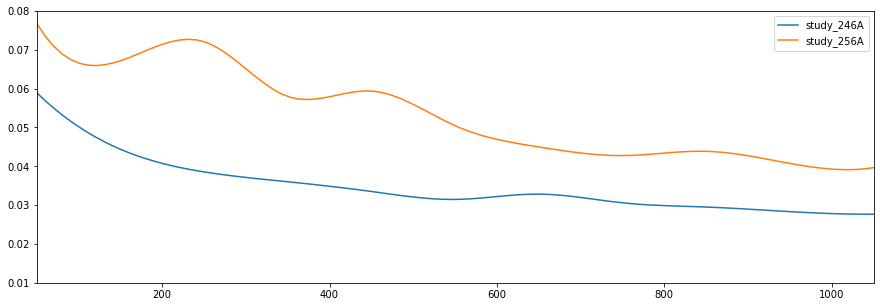

In [21]:
#add to plot
plt.figure(figsize=(15, 5))
for col in range(0,plotInfo2.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo2.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo2.columns[col])

plt.legend()
plt.xlim([50,1050])
plt.ylim([0.01,0.08])
plt.show()

### It seems that tanh seems to be performing the best long-term in all these scenarios.

# Is there an overwhelming difference in how the distribution type changes the model?

## How did the parameters vary between the models with different distributions?

In [22]:
print(studies.loc[studies.iloc[:,0] == 'study_856A'].iloc[0,0])
studies.loc[studies.iloc[:,0] == 'study_856A'].iloc[0,2].params

study_856A


{'p': 0.9057390526428688,
 'a': 0.9658701881107126,
 'dw': 0.11046693137423193,
 'din': 0.5708395323337219,
 'sin': 0.21692143018417046,
 'B': 0.0017872808358900506}

In [23]:
print(studies.loc[studies.iloc[:,0] == 'study_8569'].iloc[0,0])
studies.loc[studies.iloc[:,0] == 'study_8569'].iloc[0,2].params

study_8569


{'p': 0.8800335099405139,
 'a': 0.9698099170726442,
 'dw': 0.2415378840596624,
 'din': 0.5902738897299908,
 'sin': 0.40625523522220347,
 'B': 0.0010018612745369552}

In [24]:
print(studies.loc[studies.iloc[:,0] == 'study_856B'].iloc[0,0])
studies.loc[studies.iloc[:,0] == 'study_856B'].iloc[0,2].params

study_856B


{'p': 0.9972966507887525,
 'a': 0.9159757001345797,
 'dw': 0.5429074397567054,
 'din': 0.5818628757186146,
 'sin': 0.15060585252705055,
 'B': 0.0032335071176123396}

#### Plotted each Model w/ Different Parameters/Distribution

In [25]:
np.random.seed(0)
K = 1
L = 1
N = 100                    #From text
v = (np.random.uniform(-1,1, size)).reshape(-1,1) #from text
sv = 0.0001                #From text
sfb = 0                    #No feedback required
dfb = 0
outAlg = 1  
isBias = True
washout = 200
startState = np.zeros((1,N))

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo4 = pd.DataFrame()
count = 0

while(count < 3): #Select models for evaluation
    #Select a model
    i = 0
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_8569'].index[0]
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_856A'].index[0]
    elif count == 2:
        i = studies.loc[studies.iloc[:,0] == 'study_856B'].index[0]
    
    N = 50
    startState = np.zeros((1,N))
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = count
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = studies.iloc[i,2].user_attrs['distribution']
    
    washout = 1000
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        startState = np.zeros((1,N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            model.sv = sv
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = trainin, teacher=trainout, washout=washout)

            model.sv = 0
            predicted = model.run(input_u=testin, time=testin.shape[0],washout=washout, state=startState)

            nrmse0, mae0, r20 = getScores(testout[washout:], predicted)
            scores[k,0] = nrmse0
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo4 = pd.concat((plotInfo4, pd.DataFrame(y, columns=[str(count)])), axis=1)
    count = count + 1

In [26]:
plotInfo4 = plotInfo4.rename(columns={"0": "study_8569", "1": "study_856A", "2": "study_856B"})

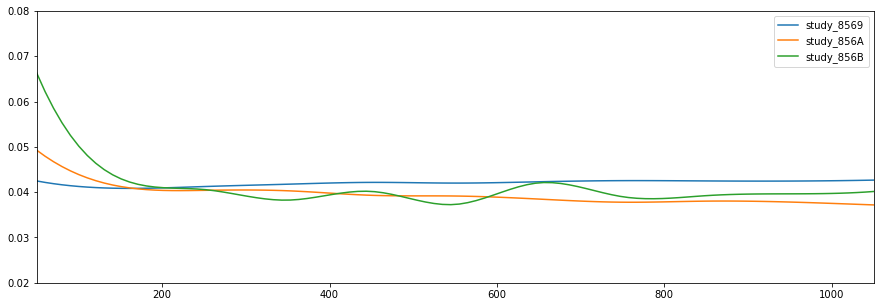

In [27]:
#add to plot
plt.figure(figsize=(15, 5))
for col in range(0,plotInfo4.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo4.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo4.columns[col])

plt.legend()
plt.xlim([50,1050])
plt.ylim([0.02,0.08])
plt.show()

### Using the same set of parameters, does varying the distribution impair the model's ability to perform?

#### Using Parameter's of study_8569 optimized model

In [28]:
np.random.seed(0)
K = 1
L = 1
N = 100                    #From text
v = (np.random.uniform(-1,1, size)).reshape(-1,1) #from text
sv = 0.0001                #From text
sfb = 0                    #No feedback required
dfb = 0
outAlg = 1  
isBias = True
washout = 200
startState = np.zeros((1,N))

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo5 = pd.DataFrame()
count = 0

i = studies.loc[studies.iloc[:,0] == 'study_8569'].index[0]
while(count < 3): #Select models for evaluation
    N = 50
    startState = np.zeros((1,N))
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = count
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    #Select a distribution
    distribution = count
    
    washout = 1000
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        startState = np.zeros((1,N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            model.sv = sv
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = trainin, teacher=trainout, washout=washout)

            model.sv = 0
            predicted = model.run(input_u=testin, time=testin.shape[0],washout=washout, state=startState)

            nrmse0, mae0, r20 = getScores(testout[washout:], predicted)
            scores[k,0] = nrmse0
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo5 = pd.concat((plotInfo5, pd.DataFrame(y, columns=[str(count)])), axis=1)
    count = count + 1

In [29]:
plotInfo5 = plotInfo5.rename(columns={"0": "study_8569", "1": "study_856A", "2": "study_856B"})

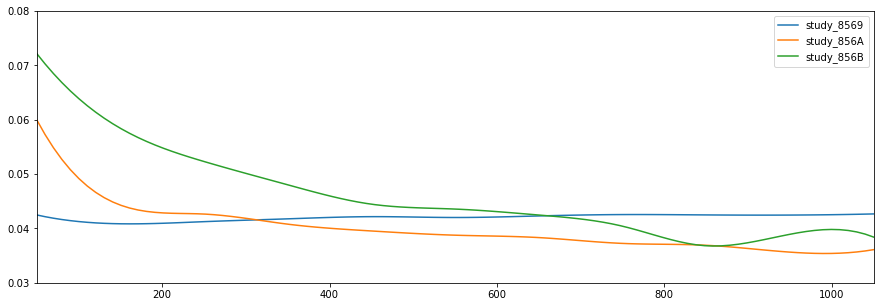

In [30]:
#add to plot
plt.figure(figsize=(15, 5))
for col in range(0,plotInfo5.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo5.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo5.columns[col])

plt.legend()
plt.xlim([50,1050])
plt.ylim([0.03,0.08])
plt.show()

#### Using Parameter's of study_856A optimized model

In [31]:
np.random.seed(0)
K = 1
L = 1
N = 100                    #From text
v = (np.random.uniform(-1,1, size)).reshape(-1,1) #from text
sv = 0.0001                #From text
sfb = 0                    #No feedback required
dfb = 0
outAlg = 1  
isBias = True
washout = 200
startState = np.zeros((1,N))

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo6 = pd.DataFrame()
count = 0

i = studies.loc[studies.iloc[:,0] == 'study_856A'].index[0]
while(count < 3): #Select models for evaluation
    N = 50
    startState = np.zeros((1,N))
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = count
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    #Select a distribution
    distribution = count
    
    washout = 1000
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        startState = np.zeros((1,N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            model.sv = sv
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = trainin, teacher=trainout, washout=washout)

            model.sv = 0
            predicted = model.run(input_u=testin, time=testin.shape[0],washout=washout, state=startState)

            nrmse0, mae0, r20 = getScores(testout[washout:], predicted)
            scores[k,0] = nrmse0
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo6 = pd.concat((plotInfo6, pd.DataFrame(y, columns=[str(count)])), axis=1)
    count = count + 1

In [32]:
plotInfo6 = plotInfo6.rename(columns={"0": "study_8569", "1": "study_856A", "2": "study_856B"})

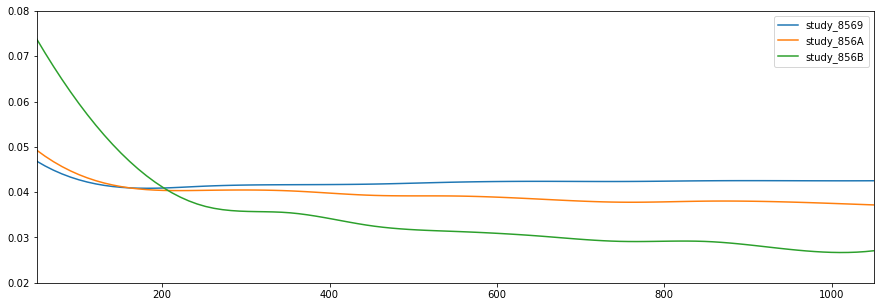

In [33]:
#add to plot
plt.figure(figsize=(15, 5))
for col in range(0,plotInfo6.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo6.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo6.columns[col])

plt.legend()
plt.xlim([50,1050])
plt.ylim([0.02,0.08])
plt.show()

#### Using Parameter's of study_846B optimized model

In [34]:
np.random.seed(0)
K = 1
L = 1
N = 100                    #From text
v = (np.random.uniform(-1,1, size)).reshape(-1,1) #from text
sv = 0.0001                #From text
sfb = 0                    #No feedback required
dfb = 0
outAlg = 1  
isBias = True
washout = 200
startState = np.zeros((1,N))

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo7 = pd.DataFrame()
count = 0

i = studies.loc[studies.iloc[:,0] == 'study_856B'].index[0]
while(count < 3): #Select models for evaluation
    N = 50
    startState = np.zeros((1,N))
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = count
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    #Select a distribution
    distribution = count
    
    washout = 1000
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        startState = np.zeros((1,N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            model.sv = sv
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = trainin, teacher=trainout, washout=washout)

            model.sv = 0
            predicted = model.run(input_u=testin, time=testin.shape[0],washout=washout, state=startState)

            nrmse0, mae0, r20 = getScores(testout[washout:], predicted)
            scores[k,0] = nrmse0
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo7 = pd.concat((plotInfo7, pd.DataFrame(y, columns=[str(count)])), axis=1)
    count = count + 1

Exceptionally bad generation of ESN. Aborting sub-trial. (1)


In [35]:
plotInfo7 = plotInfo7.rename(columns={"0": "study_8569", "1": "study_856A", "2": "study_856B"})

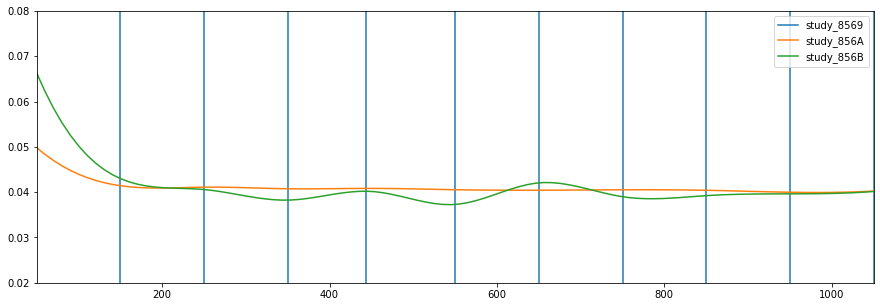

In [36]:
#add to plot
plt.figure(figsize=(15, 5))
for col in range(0,plotInfo7.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo7.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo7.columns[col])

plt.legend()
plt.xlim([50,1050])
plt.ylim([0.02,0.08])
plt.show()

# Which connections within the reservoir give the best setup for this pattern generation task?

Looking at the top 10 models:<br>
(3) x(t), y(t) or 8<br>
(3) x(t) or 2<br>
(2) u(t), x(t), y(t) or 3<br>
(2) u(t), x(t) or 1<br><br>

Scores are overall pretty similarly distributed, especially as N grows larger

## Which connections within the reservoir give the worst setup for this pattern generation task?

The following models generated awful R2 scores:

In [37]:
for i in range (25,48):
    print(studies.iloc[i,0])
    print(studies.iloc[i,2].user_attrs['R2'])
    print("\n")

study_257A
0.8824117789721142


study_2469
0.8809266804871115


study_846A
0.8788609672901537


study_1569
0.8782621211739812


study_3579
0.8780778384162559


study_146B
0.8772127898365275


study_246B
0.8757534932708558


study_347A
0.8725289705201777


study_857B
0.8716189438750475


study_2479
0.8713613706797164


study_156B
0.8677294005587078


study_8579
0.8645748816050141


study_156A
0.8618173479477139


study_247B
0.8599503295280041


study_357B
0.8578847626451456


study_157B
0.8574752347938395


study_257B
0.8565883973700833


study_147B
0.8522913198482123


study_8479
0.8502415138372102


study_3479
0.8486600044141288


study_347B
0.845052091675038


study_256B
0.8372024626426378


study_1479
0.8371092367767856




All these models perform relatively well, although some worse than others. However, some model instiations may have just found a better parameter set during the optimization process so it is fair to say these models are competitive with one another given the best set of parameters for a given model.